## Introducción a las redes neuronales
<a id="index"></a>

- Bloques básicos de una red neuronal
  - [La neurona artificial](#nmcp)
  - [Función de activación](#actfx)
  - [Escalado de datos](#scaling)
- [Regresión lineal como una red neuronal](#rlsnn)
  - Minimizando una función de pérdida: MSE
  - Evaluación del modelo de regresión lineal
- [Regresión lineal múltiple como una red neuronal](#rlmnn)
- [Regresión logística como una red neuronal](#logregnn)
  - Minimizando una función de pérdida: Binary Cross entropy
  - Evaluando un modelo de clasificación (regresión logística)
  - [Regresión logística multivariada como una red neuronal](#logregmv)
- [Regresión logística multinomial como una red neuronal](#mlogregnn)
- [Sesgo (bias) neuronal en una red artificial](#bias)
- [Minimización de una función de pérdida (loss) por descenso por gradiente](#gradient)
- [Perceptrón multicapa / Multi-layer perceptron (MLP)](#mlp)

# 🧠 Neurona de McCulloch-Pitts
<a id="nmcp"></a>


Es el **modelo más simple de neurona artificial**, propuesto en 1943 por Warren McCulloch y Walter Pitts. Representa una neurona como un sistema lógico binario: **las entradas y la salida son 0 o 1**.

### ⚙️ Estructura de la Neurona

1. **Entradas** $x_1, x_2, ..., x_n$ — valores binarios (0 o 1)
2. **Pesos** $w_1, w_2, ..., w_n$ — ponderan cada entrada (también binarios o constantes)
3. **Suma ponderada**:

   $$
   z = \sum_{i=1}^{n} w_i \cdot x_i
   $$
4. **Función de activación** (threshold o umbral):

   $$
   y =
   \begin{cases}
   1 & \text{si } z \geq \theta \\
   0 & \text{si } z < \theta
   \end{cases}
   $$

### 🔄 Funcionamiento General

* Recibe varias entradas binaras
* Las pondera con sus pesos
* Suma el resultado
* Compara con un **umbral fijo ($\theta$)**
* Si se supera el umbral, **la neurona se activa (sale 1)**, de lo contrario, **no se activa (sale 0)**

### 📐 Ejemplo: Compuerta lógica AND

* Entradas: $x_1, x_2$
* Pesos: $w_1 = 1, w_2 = 1$
* Umbral: $\theta = 2$

| $x_1$ | $x_2$ | $z$ | $y$ |
| ----- | ----- | --- | --- |
| 0     | 0     | 0   | 0   |
| 0     | 1     | 1   | 0   |
| 1     | 0     | 1   | 0   |
| 1     | 1     | 2   | 1   |

✅ Activa **solo si ambas entradas son 1**.

### 🎯 ¿Para qué sirve?

* Fue el **punto de partida del campo de redes neuronales artificiales**
* Puede simular **funciones lógicas básicas**
* Aunque es limitada, **inspira la arquitectura de las neuronas modernas**

Claro. Extender la **neurona de McCulloch-Pitts** a valores continuos implica transicionar desde un modelo **discreto y lógico** (valores binarios y función umbral) a un modelo **realista y diferenciable**, base de las redes neuronales modernas (perceptrón o MLP).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Artificial_neuron_structure.svg/1920px-Artificial_neuron_structure.svg.png)

- **Recursos:**
  - [McCulloch-Pitts Neuron — Mankind’s First Mathematical Model Of A Biological Neuron](https://medium.com/data-science/mcculloch-pitts-model-5fdf65ac5dd1)

### 🔄 Extensión: de McCulloch-Pitts a Neurona Continua

| Aspecto               | McCulloch-Pitts                     | Neurona Continua (Perceptrón)                |
| --------------------- | ----------------------------------- | -------------------------------------------- |
| Entradas              | Binarias (0 o 1)                    | Reales $x_i \in \mathbb{R}$                  |
| Pesos                 | Fijos o 1                           | Reales $w_i \in \mathbb{R}$                  |
| Suma                  | $\sum x_i$                          | $z = \sum w_i x_i + b$                       |
| Activación            | Umbral duro                         | Función continua y diferenciable             |
| Ejemplo de activación | $f(z) = \mathbb{1}_{z \geq \theta}$ | $f(z) = \sigma(z), \tanh(z), \text{ReLU}(z)$ |
| Aprendizaje           | Manual (umbral fijo)                | Aprende pesos y bias con gradient descent    |


### Nueva fórmula general

$$
\text{Salida: } y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

Donde:

* $x_i$: entrada real
* $w_i$: peso real
* $b$: bias (también aprendido)
* $f(\cdot)$: función de activación continua (sigmoide, tanh, ReLU, etc.)


### 🎯 ¿Qué funciones de activación se usan?

| Función  | Fórmula                                        | Uso común                         |
| -------- | ---------------------------------------------- | --------------------------------- |
| Sigmoide | $\sigma(z) = \frac{1}{1 + e^{-z}}$             | Problemas binarios, salida \[0,1] |
| Tanh     | $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$ | Salida en \[-1,1]                 |
| ReLU     | $\max(0, z)$                                   | Muy usada en capas ocultas        |


### 🧩 ¿Por qué es importante esta extensión?

1. ✅ Permite usar técnicas de **optimización como el descenso por gradiente**
2. ✅ Hace posible el **aprendizaje automático de los pesos**
3. ✅ Permite usar muchas neuronas → redes profundas

## Función de activación
<a id="actfx"></a>

Es una operación matemática que se aplica a la salida ponderada de cada neurona, es decir, después de calcular:

$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

la salida de la neurona es:

$$
a = f(z)
$$

Donde $f(\cdot)$ es la **función de activación**.

### 🚫 ¿Qué pasa si no usamos activación?

Si cada capa fuera puramente lineal:

$$
a = w_2(w_1 x + b_1) + b_2
$$

entonces toda la red sería **una sola transformación lineal**. No podría aprender relaciones complejas no lineales.


### ✅ ¿Qué aporta la activación?

| Propiedad               | Descripción                                                                                         |
| ----------------------- | --------------------------------------------------------------------------------------------------- |
| **No linealidad**       | Permite que la red aprenda relaciones complejas y no triviales                                      |
| **Separabilidad**       | Ayuda a distinguir clases en espacios de entrada complejos                                          |
| **Capacidad universal** | Una red con activaciones no lineales puede aproximar cualquier función continua (teorema universal) |
| **Diferenciabilidad**   | Permite usar **descenso por gradiente** para ajustar los pesos durante el aprendizaje               |

### 🔍 Funciones de activación más comunes

### 1. **Sigmoide**

$$
f(z) = \frac{1}{1 + e^{-z}}
$$

| Propiedades | Valor                                                   |
| ----------- | ------------------------------------------------------- |
| Rango       | (0, 1)                                                  |
| Ventaja     | Interpretable como probabilidad                         |
| Problemas   | Gradiente se aplana → **desvanecimiento del gradiente** |


### 2. **Tanh**

$$
f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} = 2\sigma(2z) - 1
$$

| Propiedades | Valor              |
| ----------- | ------------------ |
| Rango       | (-1, 1)            |
| Ventaja     | Centrado en cero   |
| Problemas   | Mismo que sigmoide |


### 3. **ReLU (Rectified Linear Unit)**

$$
f(z) = \max(0, z)
$$

| Propiedades | Valor                                                             |
| ----------- | ----------------------------------------------------------------- |
| Rango       | \[0, ∞)                                                           |
| Ventaja     | Computacionalmente eficiente, evita saturación                    |
| Problemas   | **Muerte de neuronas** si la entrada es negativa por mucho tiempo |


### 4. **Leaky ReLU**

$$
f(z) =
\begin{cases}
z & \text{si } z \geq 0 \\
\alpha z & \text{si } z < 0
\end{cases}
$$

* Donde $\alpha$ es un pequeño valor, como 0.01
* Soluciona el problema de muerte de ReLU


### 5. **Softmax**

$$
f(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

* Convierte una **salida de múltiples clases** en una distribución de probabilidad
* Se usa **en la última capa** de modelos de clasificación multiclase


### 🎯 ¿Dónde se usan?

| Capa                 | Activación típica      |
| -------------------- | ---------------------- |
| Ocultas (interiores) | ReLU, Leaky ReLU, tanh |
| Salida binaria       | Sigmoide               |
| Salida multiclase    | Softmax                |
| Salida regresiva     | Lineal                 |

![](https://raw.githubusercontent.com/marsgr6/r-scripts/refs/heads/master/imgs/nn_actfx.png)

![](https://raw.githubusercontent.com/marsgr6/r-scripts/refs/heads/master/imgs/softmax_nn.png)

### ✨ GELU – Gaussian Error Linear Unit

$$
f(z) = z \cdot \Phi(z)
$$

Donde $\Phi(z)$ es la **función de distribución acumulada de la normal estándar**:

$$
\Phi(z) = \frac{1}{2} \left(1 + \text{erf}\left( \frac{z}{\sqrt{2}} \right)\right)
$$

### 🔍 Aproximación computacional común:

$$
f(z) \approx 0.5 z \left(1 + \tanh\left[\sqrt{\frac{2}{\pi}} \left(z + 0.044715 z^3\right)\right]\right)
$$

### ✅ Propiedades de GELU

| Propiedad     | Valor                                                            |
| ------------- | ---------------------------------------------------------------- |
| Rango         | Continuo (similar a ReLU para positivos, pero más suave)         |
| Diferenciable | Sí (suave y continuo)                                            |
| Ventaja       | Combina los beneficios de ReLU y Sigmoid (activación y suavidad) |
| Uso actual    | Muy usada en **Transformers, BERT, GPT** y redes modernas de NLP |


### 🔬 Comparativa visual rápida

| Función       | Rango          | Ventaja clave                                        | Problema                   |
| ------------- | -------------- | ---------------------------------------------------- | -------------------------- |
| **Sigmoid**   | (0, 1)         | Interpretable, salida binaria                        | Gradiente pequeño          |
| **Tanh**      | (-1, 1)        | Centrado                                             | Gradiente pequeño          |
| **ReLU**      | \[0, ∞)        | Rápida, simple, no saturación                        | Muertes (z < 0)            |
| **LeakyReLU** | \[≈−∞, ∞)      | Evita muertes, simple                                | Algo arbitraria            |
| **Softmax**   | (0, 1), suma 1 | Probabilidades multicategoría                        | No para capas ocultas      |
| **GELU**      | Real line      | Activación **suave y adaptativa**, bien fundamentada | Costo computacional (leve) |


### ¿Por qué GELU es popular?

* Su activación es más **probabilística** que binaria
* Al mantener gradientes suaves, facilita el **flujo de información**
* Mejora la **convergencia** y estabilidad en redes profundas

## 🧩 Conclusión

> Las funciones de activación dan a las redes neuronales su **poder expresivo**. Permiten que las capas trabajen en conjunto para **aprender patrones complejos, no lineales y altamente abstractos**, que serían imposibles de representar con funciones lineales.

## Regresión lineal simple como una red neuronal
<a id="rlsnn"></a>

Una **regresión lineal simple** se puede interpretar como un caso particular de una **red neuronal de una sola capa** con una estructura mínima: una **neurona de entrada**, un **sesgo (bias)** y una **neurona de salida** sin función de activación (o con activación lineal). 

### 🔹 1. Arquitectura

* **Entrada:** una variable $x$
* **Pesos:** un único peso $w$ que multiplica a la entrada
* **Bias:** un valor escalar $b$ que se suma
* **Salida:** la predicción $\hat{y}$ se calcula como:

$$
\hat{y} = wx + b
$$

Esto es exactamente la ecuación de la **regresión lineal simple**.


### 🔹 2. Función de pérdida

Para ajustar los parámetros $w$ y $b$, se utiliza típicamente el **error cuadrático medio (MSE)** como función de pérdida:

$$
\mathcal{L}(w, b) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (w x_i + b) \right)^2
$$

Donde:

* $x_i$ son las entradas
* $y_i$ son los valores reales
* $\hat{y}_i = wx_i + b$ son las predicciones


### 🔹 3. Entrenamiento: Descenso por gradiente

Para encontrar los valores óptimos de $w$ y $b$, se utiliza el **descenso de gradiente**:

1. Se inicializan $w$ y $b$ con valores aleatorios.
2. En cada iteración:

   * Se calcula el gradiente de la función de pérdida con respecto a $w$ y $b$
   * Se actualizan los parámetros:

$$
w \leftarrow w - \eta \cdot \frac{\partial \mathcal{L}}{\partial w}, \quad
b \leftarrow b - \eta \cdot \frac{\partial \mathcal{L}}{\partial b}
$$

Donde $\eta$ es la **tasa de aprendizaje**.

Una **regresión lineal simple** es funcionalmente equivalente a una **red neuronal con una sola capa lineal**, sin activación, que aprende a ajustar sus parámetros a partir de un conjunto de datos mediante descenso por gradiente.

### 🔍 Estructura Red Neuronal para Regresión Lineal Simple

![](https://raw.githubusercontent.com/marsgr6/r-scripts/refs/heads/master/imgs/slregnn.png)

* **Capa de entrada**: 1 característica ($x_1$)
* **Nodo de sesgo (bias)**: Entrada constante
* **Nodo de salida**: Una neurona lineal etiquetada como `ŷ (lineal)`

Este modelo calcula:

$$
\hat{y} = w_1 x_1 + b
$$

Es decir, predice una salida continua a partir de una sola variable, exactamente como lo hace la **regresión lineal simple**.

### Recursos

- [Regresión lineal](https://nbviewer.org/github/marsgr6/estadistica-ux/blob/main/linear_regression.ipynb)

## Escalado de datos
<a id="scaling"></a>

Las redes neuronales funcionan mejor cuando **las entradas y salidas están en rangos similares**. Si no se escalan:

### 🔻 Problemas que pueden ocurrir:

| Problema                               | Consecuencia                                            |
| -------------------------------------- | ------------------------------------------------------- |
| Diferentes rangos en variables         | Algunas dominan el aprendizaje, otras se ignoran        |
| Gradientes muy pequeños o grandes      | Entrenamiento inestable o muy lento                     |
| Saturación de activaciones             | Funciones como Sigmoid/Tanh pueden quedar sin gradiente |
| Explosión o desaparición de gradientes | No aprendizaje en capas profundas                       |

### ✅ ¿Qué ventajas tiene escalar?

* Mejora la **convergencia** (menos épocas)
* Hace más **estable el entrenamiento**
* Permite usar **tasas de aprendizaje razonables**
* Facilita el uso de **optimizadores adaptativos** como Adam

### 🔧 Tipos comunes de escalado

| Método             | Fórmula                                      | Rango típico          | Uso común en             |           |                 |
| ------------------ | -------------------------------------------- | --------------------- | ------------------------ | --------- | --------------- |
| **MinMaxScaler**   | $x' = \frac{x - \min(x)}{\max(x) - \min(x)}$ | $[0, 1]$              | Imágenes, sensores       |           |                 |
| **StandardScaler** | $x' = \frac{x - \mu}{\sigma}$                | media 0, var 1        | Datos normales           |           |                 |
| **RobustScaler**   | Basado en mediana y IQR                      | insensible a outliers | Datos con outliers       |           |                 |
| **MaxAbsScaler**   | $x' = \dfrac{x}{\max\left( |x| \right)}$                     | $[-1, 1]$            | Datos dispersos, centrados en 0        |
| **Log Transform**  | $x' = \log(x + 1)$                           | Reduce escala         | Datos positivos sesgados |           |                 |

### 🎯 ¿Qué se escala?

* **Entradas**: SIEMPRE deben escalarse
* **Salidas**: También, si el problema es regresión (luego se aplica `inverse_transform`)
* **Pesos y activaciones internas**: Se estabilizan con **BatchNorm** o **LayerNorm**, no se escalan manualmente


### 📌 ¿Cuándo usar cada uno?

| Situación                             | Escalado recomendado    |
| ------------------------------------- | ----------------------- |
| Datos densos y en diferentes unidades | `StandardScaler`        |
| Imagen en píxeles (0–255)             | `MinMaxScaler`          |
| Datos económicos con outliers         | `RobustScaler`          |
| Todo positivo, exponencial            | `LogTransform + MinMax` |

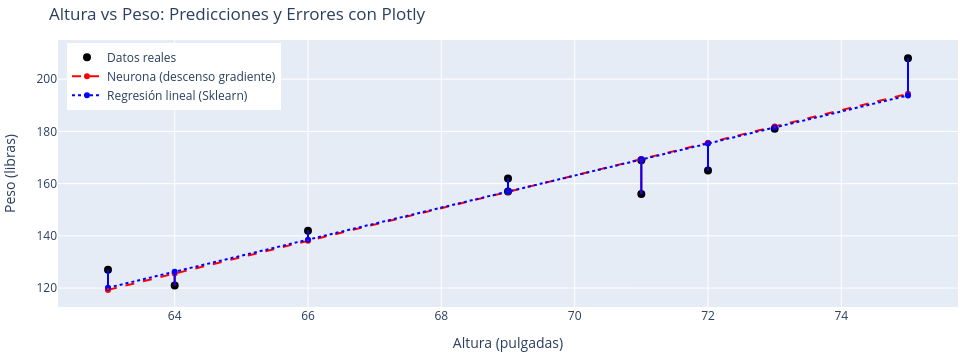

{'NN_weight_rescaled': 6.261, 'NN_bias_rescaled': -275.1497, 'LinearRegression_coef': 6.1376, 'LinearRegression_intercept': -266.5344, 'MSE_NeuralNetwork': 59.95, 'MSE_LinearRegression': 59.74}


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

# Original data: Altura (pulgadas) y Peso (libras)
X_raw = np.array([[63], [64], [66], [69], [69], [71], [71], [72], [73], [75]])
y_raw = np.array([[127], [121], [142], [157], [162], [156], [169], [165], [181], [208]])

# Escalado min-max
X_min, X_max = X_raw.min(), X_raw.max()
y_min, y_max = y_raw.min(), y_raw.max()

X = (X_raw - X_min) / (X_max - X_min)
y = (y_raw - y_min) / (y_max - y_min)

# Inicialización de pesos y sesgo para la neurona
np.random.seed(0)
w = np.random.randn(1, 1)
b = np.zeros((1,))

# Función de activación lineal y pérdida
def activation(z):
    return z

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Descenso de gradiente
lr = 0.05
n_epochs = 1000

for epoch in range(n_epochs):
    z = X @ w + b
    y_pred = activation(z)
    error = y_pred - y
    loss = mse(y, y_pred)

    dw = X.T @ error / len(X)
    db = np.mean(error)

    w -= lr * dw
    b -= lr * db

# Predicción y desescalado
y_pred_scaled = X @ w + b
y_pred_nn = y_pred_scaled * (y_max - y_min) + y_min

# Regresión lineal con sklearn
model = LinearRegression()
model.fit(X_raw, y_raw)
y_pred_lr = model.predict(X_raw)

# Cálculo de pesos en escala original para la neurona
w_original = (y_max - y_min) / (X_max - X_min) * w[0, 0]
b_original = (y_max - y_min) * b[0] + y_min - w_original * X_min

# MSE
mse_nn = mean_squared_error(y_raw, y_pred_nn)
mse_lr = mean_squared_error(y_raw, y_pred_lr)

# ============================
# 📊 PLOTLY INTERACTIVO
# ============================

# Ordenar para curvas suaves
sorted_idx = np.argsort(X_raw[:, 0])
X_sorted = X_raw[sorted_idx].flatten()
y_sorted = y_raw[sorted_idx].flatten()
y_pred_nn_sorted = y_pred_nn[sorted_idx].flatten()
y_pred_lr_sorted = y_pred_lr[sorted_idx].flatten()

# Crear gráfico
fig = go.Figure()

# Datos reales
fig.add_trace(go.Scatter(x=X_sorted, y=y_sorted, mode='markers',
                         marker=dict(color='black', size=8),
                         name='Datos reales'))

# Predicción neurona
fig.add_trace(go.Scatter(x=X_sorted, y=y_pred_nn_sorted, mode='lines+markers',
                         line=dict(color='red', dash='dash'),
                         name='Neurona (descenso gradiente)'))

# Predicción regresión lineal
fig.add_trace(go.Scatter(x=X_sorted, y=y_pred_lr_sorted, mode='lines+markers',
                         line=dict(color='blue', dash='dot'),
                         name='Regresión lineal (Sklearn)'))

# Líneas de error (residuos) neurona
for i in range(len(X_sorted)):
    fig.add_trace(go.Scatter(
        x=[X_sorted[i], X_sorted[i]],
        y=[y_sorted[i], y_pred_nn_sorted[i]],
        mode='lines',
        line=dict(color='red', width=2),
        showlegend=False
    ))

# Líneas de error (residuos) regresión lineal
for i in range(len(X_sorted)):
    fig.add_trace(go.Scatter(
        x=[X_sorted[i], X_sorted[i]],
        y=[y_sorted[i], y_pred_lr_sorted[i]],
        mode='lines',
        line=dict(color='blue', width=2),
        showlegend=False
    ))

# Layout
fig.update_layout(
    title="Altura vs Peso: Predicciones y Errores con Plotly",
    xaxis_title="Altura (pulgadas)",
    yaxis_title="Peso (libras)",
    height=500,
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=20, r=20, t=40, b=20)
)

fig.show()

# ============================
# 🧾 Métricas y pesos
# ============================
print({
    "NN_weight_rescaled": round(float(w_original), 4),
    "NN_bias_rescaled": round(float(b_original), 4),
    "LinearRegression_coef": round(float(model.coef_[0, 0]), 4),
    "LinearRegression_intercept": round(float(model.intercept_[0]), 4),
    "MSE_NeuralNetwork": round(mse_nn, 2),
    "MSE_LinearRegression": round(mse_lr, 2)
})

## Regresión lineal múltiple como red neuronal de una capa
<a id="rlmnn"></a>

### 🔹 1. Arquitectura

* **Entradas:** un vector de características $\mathbf{x} = [x_1, x_2, \dots, x_d]$
  (donde $d$ es el número de variables independientes)
* **Pesos:** un vector de pesos $\mathbf{w} = [w_1, w_2, \dots, w_d]$
* **Bias:** un escalar $b$
* **Salida:** una única neurona que produce la predicción $\hat{y}$:

$$
\hat{y} = \mathbf{w}^\top \mathbf{x} + b = \sum_{j=1}^d w_j x_j + b
$$

📌 Esta es exactamente la fórmula de la **regresión lineal múltiple**.


### 🔹 2. Función de pérdida: Error cuadrático medio (MSE)

Para entrenar la red, se usa una función de pérdida que mida la diferencia entre las predicciones $\hat{y}_i$ y los valores reales $y_i$:

$$
\mathcal{L}(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (\mathbf{w}^\top \mathbf{x}_i + b) \right)^2
$$

### 🔹 3. Entrenamiento con descenso por gradiente

1. Se inicializan los pesos $\mathbf{w}$ y el sesgo $b$ aleatoriamente.
2. En cada iteración del entrenamiento:

   * Se calcula la salida $\hat{y}_i$ para cada muestra.
   * Se evalúa el error y se calcula el gradiente respecto a $\mathbf{w}$ y $b$.
   * Se actualizan los parámetros:

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{w}}, \quad
b \leftarrow b - \eta \cdot \frac{\partial \mathcal{L}}{\partial b}
$$

donde $\eta$ es la tasa de aprendizaje.

### 🔍 Estructura: Red Neuronal para Regresión Lineal Múltiple

![](https://raw.githubusercontent.com/marsgr6/r-scripts/refs/heads/master/imgs/mlregnn.png)


* **Capa de entrada**: 3 características ($x_1, x_2, x_3$)
* **Nodo de sesgo (bias)**: Entrada constante
* **Nodo de salida**: Una neurona lineal etiquetada como `ŷ (lineal)`

Este modelo calcula:

$$
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b
$$

Lo que corresponde a la **regresión lineal múltiple**, usada para predecir un valor continuo a partir de varias variables independientes.

Ambas redes (regresión simple y múltiple) son completamente conectadas, sin capas ocultas ni funciones de activación no lineales, reflejando el comportamiento clásico de los modelos lineales. ¿Quieres que incluya estas explicaciones en formato Markdown o LaTeX para tus notas o presentaciones?

### 🔍 Observaciones

* Esta red tiene **una sola capa de salida lineal**, sin activaciones no lineales.
* El modelo es **completamente interpretable**, como en la regresión tradicional.
* Cada peso $w_j$ indica la **influencia directa** de la variable $x_j$ en la predicción.


### ✅ Conclusión

Una **regresión lineal múltiple** es funcionalmente equivalente a una **red neuronal de una sola capa completamente conectada**, sin función de activación, que aprende a ajustar pesos y sesgo usando descenso por gradiente.

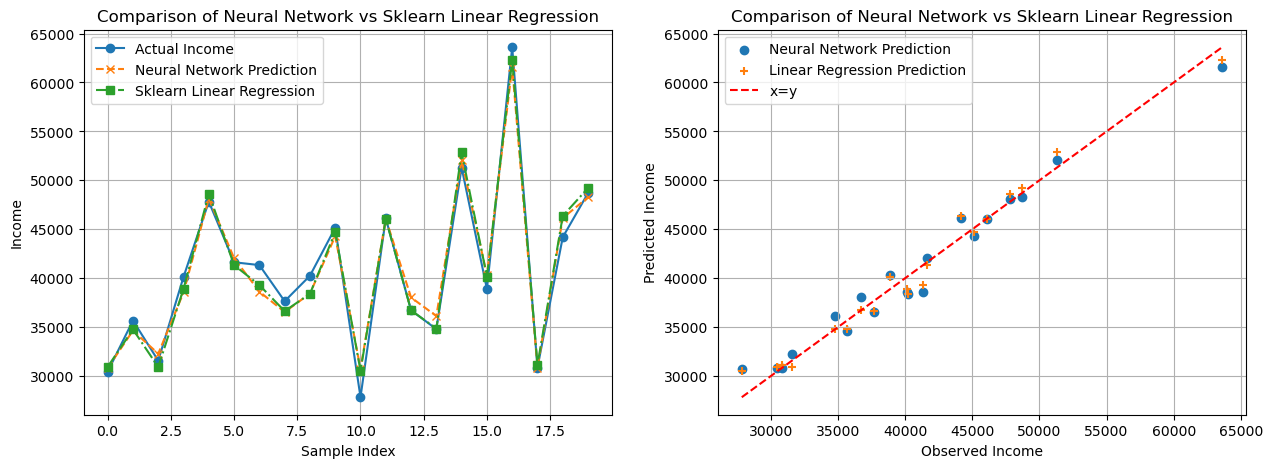

{'NN_weights_rescaled': array([ -23.02758776, 1969.77549655]),
 'NN_bias_rescaled': 29428.431026235587,
 'MSE_NeuralNetwork': 1978276.6008504115,
 'MSE_LinearRegression': 1533633.9787141783,
 'LinearRegression_weights': array([ -99.19535546, 2162.40419192]),
 'LinearRegression_intercept': 31261.689854101278}

In [123]:
# Complete code for training a neural network and comparing to LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/marsgr6/r-scripts/refs/heads/master/data/viz_data/multiple_linear_regression_dataset.csv")

# Extract features and target
X_raw = df[['age', 'experience']].values
y_raw = df[['income']].values

# Min-max scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X_raw)
y = scaler_y.fit_transform(y_raw)

# Initialize weights and bias
np.random.seed(0)
w = np.random.randn(2, 1)
b = np.zeros((1,))

# Activation and loss
def activation(z):
    return z

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Training via gradient descent
lr = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
    z = X @ w + b
    y_pred = activation(z)
    error = y_pred - y
    loss = mse(y, y_pred)

    dw = X.T @ error / len(X)
    db = np.mean(error)

    w -= lr * dw
    b -= lr * db

# Predict and inverse transform
y_pred_scaled = X @ w + b
y_pred_nn = scaler_y.inverse_transform(y_pred_scaled)

# Sklearn model
lr_model = LinearRegression()
lr_model.fit(X_raw, y_raw)
y_pred_sklearn = lr_model.predict(X_raw)

# Plot predictions
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(y_raw, label="Actual Income", marker='o')
plt.plot(y_pred_nn, label="Neural Network Prediction", linestyle='--', marker='x')
plt.plot(y_pred_sklearn, label="Sklearn Linear Regression", linestyle='-.', marker='s')
plt.xlabel("Sample Index")
plt.ylabel("Income")
plt.title("Comparison of Neural Network vs Sklearn Linear Regression")
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(y_raw, y_pred_nn, marker='o', label="Neural Network Prediction")
plt.scatter(y_raw, y_pred_sklearn, marker='+', label="Linear Regression Prediction")
plt.xlabel("Observed Income")
plt.ylabel("Predicted Income")
plt.title("Comparison of Neural Network vs Sklearn Linear Regression")
# Plot the line x=y
x_line = np.linspace(min(y_raw), max(y_raw), 100)
y_line = x_line
plt.plot(x_line, y_line, label='x=y', color='red', linestyle='--')
plt.legend()

plt.grid(True)
plt.show()

# Compute MSE
mse_nn = mean_squared_error(y_raw, y_pred_nn)
mse_sklearn = mean_squared_error(y_raw, y_pred_sklearn)

# Convert NN weights to original scale
X_min = scaler_X.data_min_
X_max = scaler_X.data_max_
y_min = scaler_y.data_min_[0]
y_max = scaler_y.data_max_[0]

s_x = X_max - X_min
s_y = y_max - y_min

w_original = (s_y / s_x).reshape(-1, 1) * w
bias_original = (
    s_y * b[0]
    + y_min
    - np.sum((w_original.flatten() * X_min))
)

{
    "NN_weights_rescaled": w_original.flatten(),
    "NN_bias_rescaled": bias_original,
    "MSE_NeuralNetwork": mse_nn,
    "MSE_LinearRegression": mse_sklearn,
    "LinearRegression_weights": lr_model.coef_.flatten(),
    "LinearRegression_intercept": lr_model.intercept_[0]
}

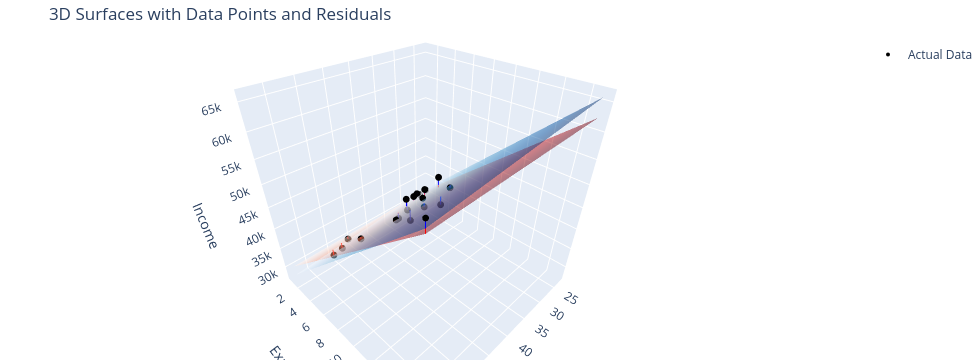

<Figure size 1400x600 with 0 Axes>

In [6]:
# Reload the uploaded dataset
df = pd.read_csv("https://raw.githubusercontent.com/marsgr6/r-scripts/refs/heads/master/data/viz_data/multiple_linear_regression_dataset.csv")

# Extract features and target
X_raw = df[['age', 'experience']].values
y_raw = df[['income']].values

# Min-max scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X_raw)
y = scaler_y.fit_transform(y_raw)

# Initialize weights and bias for the neural network
np.random.seed(0)
w = np.random.randn(2, 1)
b = np.zeros((1,))

# Define activation and loss
def activation(z):
    return z

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Train neural network using gradient descent
lr = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
    z = X @ w + b
    y_pred = activation(z)
    error = y_pred - y
    loss = mse(y, y_pred)

    dw = X.T @ error / len(X)
    db = np.mean(error)

    w -= lr * dw
    b -= lr * db

# Predict and inverse scale
y_pred_scaled = X @ w + b
y_pred_nn = scaler_y.inverse_transform(y_pred_scaled)

# Train scikit-learn linear regression model
lr_model = LinearRegression()
lr_model.fit(X_raw, y_raw)
y_pred_sklearn = lr_model.predict(X_raw)

# Prepare meshgrid for 3D surface plot
x1_range = np.linspace(X_raw[:, 0].min(), X_raw[:, 0].max(), 50)
x2_range = np.linspace(X_raw[:, 1].min(), X_raw[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
x_grid_flat = np.column_stack([x1_grid.ravel(), x2_grid.ravel()])

# Predict using neural network on the grid
X_grid_scaled = scaler_X.transform(x_grid_flat)
y_pred_nn_grid_scaled = X_grid_scaled @ w + b
y_pred_nn_grid = scaler_y.inverse_transform(y_pred_nn_grid_scaled)
Z_nn = y_pred_nn_grid.reshape(x1_grid.shape)

# Predict using sklearn model on the grid
y_pred_lr_grid = lr_model.predict(x_grid_flat)
Z_lr = y_pred_lr_grid.reshape(x1_grid.shape)

# Plotting both surfaces
fig = plt.figure(figsize=(14, 6))

# Plot both 3D surfaces in a single plot for direct comparison
import plotly.graph_objects as go

# Predict income on raw data using both models
y_pred_nn_pts = scaler_y.inverse_transform((X @ w + b))
y_pred_lr_pts = lr_model.predict(X_raw)

# Create plotly figure
fig = go.Figure()

# Neural network surface
fig.add_trace(go.Surface(
    z=Z_nn, x=x1_grid, y=x2_grid,
    colorscale='Reds', opacity=0.5,
    name='Neural Network', showscale=False
))

# Linear regression surface
fig.add_trace(go.Surface(
    z=Z_lr, x=x1_grid, y=x2_grid,
    colorscale='Blues', opacity=0.5,
    name='Linear Regression', showscale=False
))

# Actual data points
fig.add_trace(go.Scatter3d(
    x=X_raw[:, 0], y=X_raw[:, 1], z=y_raw.flatten(),
    mode='markers',
    marker=dict(size=4, color='black'),
    name='Actual Data'
))

# Residual lines (Neural Network)
for i in range(len(X_raw)):
    fig.add_trace(go.Scatter3d(
        x=[X_raw[i, 0], X_raw[i, 0]],
        y=[X_raw[i, 1], X_raw[i, 1]],
        z=[y_raw[i, 0], y_pred_nn_pts[i, 0]],
        mode='lines',
        line=dict(color='red', width=2),
        showlegend=False
    ))

# Residual lines (Linear Regression)
for i in range(len(X_raw)):
    fig.add_trace(go.Scatter3d(
        x=[X_raw[i, 0], X_raw[i, 0]],
        y=[X_raw[i, 1], X_raw[i, 1]],
        z=[y_raw[i, 0], y_pred_lr_pts[i, 0]],
        mode='lines',
        line=dict(color='blue', width=2),
        showlegend=False
    ))

# Layout
fig.update_layout(
    title='3D Surfaces with Data Points and Residuals',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Experience',
        zaxis_title='Income'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

## Representación de Red Neuronal de la Regresión Logística Binaria
<a id="logregnn"></a>

La **regresión logística binaria** es equivalente a una **red neuronal de una sola capa** (sin capas ocultas) que contiene:

* Una o más **características de entrada**
* Una **única neurona de salida**
* Una **función de activación sigmoide** aplicada en la salida

Este es el equivalente neuronal del modelo utilizado para estimar la probabilidad de un resultado binario.


### 🔄 Forma Matemática

Dado un vector de entrada $\mathbf{x} \in \mathbb{R}^d$, el modelo calcula:

$$
z = \mathbf{w}^\top \mathbf{x} + b
$$

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Donde:

* $\sigma(z)$ es la **función sigmoide**
* $\hat{y} \in (0,1)$ se interpreta como la **probabilidad de la clase positiva**


### 🖼️ Diagrama de la Red Neuronal

A continuación se muestra un diagrama conceptual que representa la regresión logística binaria como una red neuronal:

![Red Neuronal para Regresión Logística Binaria](https://raw.githubusercontent.com/marsgr6/r-scripts/refs/heads/master/imgs/nn_logreg_binary.png)

### 🔍 Descripción de la Estructura:

* **Capa de entrada**: 3 características ($x_1, x_2, x_3$)
* **Nodo de sesgo (bias)**: Una entrada constante
* **Nodo de salida**: Una sola neurona etiquetada como `ŷ (sigmoid)` que aplica la **activación sigmoide**

Esta arquitectura calcula:

$$
\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + w_3 x_3 + b)
$$

Esto refleja el modelo de **regresión logística binaria**, representado como una red neuronal de una sola capa.


### ✅ Características Clave

* **Transformación lineal** desde la entrada hasta la salida: $\mathbf{w}^\top \mathbf{x} + b$
* La **activación sigmoide** asegura que la salida esté entre 0 y 1
* **Función de pérdida**: entropía cruzada binaria

### 🧩 Resumen

| Componente     | Regresión Logística         | Equivalente en Red Neuronal                |
| -------------- | --------------------------- | ------------------------------------------ |
| Tipo de modelo | Clasificador lineal binario | Red neuronal de una sola capa con sigmoide |
| Activación     | Sigmoide                    | Sigmoide                                   |
| Salida         | Probabilidad de clase 1     | Igual                                      |
| Pérdida        | Entropía cruzada binaria    | Igual                                      |

Este ejemplo muestra cómo incluso las redes neuronales más simples están fuertemente relacionadas con los modelos estadísticos clásicos.

### Recursos

- [La Regresión logística Simple](https://nbviewer.org/github/marsgr6/analitica-online/blob/main/predictiva/Unidad_No_3_Regresion_logistica_simple.ipynb)

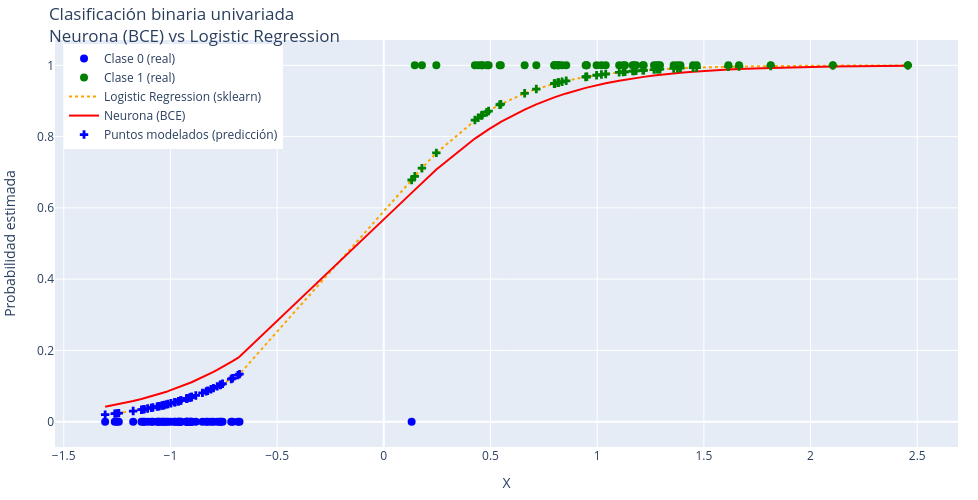

📊 Accuracy:
Neural Network (BCE): 0.98
Logistic Regression:  0.98
Logreg Coefficients: [[3.24293979]]
Logreg Intercept: [0.32284014]


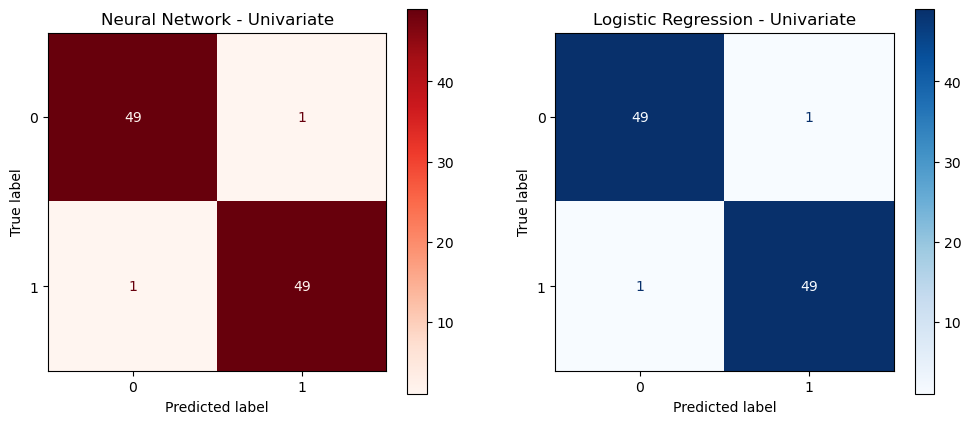

In [114]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# 1. Generate data
X_uni, y_uni = make_classification(n_samples=100, n_features=1, n_informative=1,
                                   n_redundant=0, n_clusters_per_class=1, flip_y=0.03, random_state=42)

# 2. Scale input
scaler_uni = MinMaxScaler()
X_uni_scaled = scaler_uni.fit_transform(X_uni)

# 3. Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. Initialize neural network
np.random.seed(0)
w_uni = np.random.randn(1, 1)
b_uni = np.zeros((1,))
lr = 0.25
n_epochs = 1000

# 5. Train with Binary Cross-Entropy
for epoch in range(n_epochs):
    z = X_uni_scaled @ w_uni + b_uni
    y_prob_uni_nn = sigmoid(z)

    eps = 1e-15
    y_clipped = np.clip(y_prob_uni_nn, eps, 1 - eps)
    loss = -np.mean(y_uni.reshape(-1, 1) * np.log(y_clipped) +
                    (1 - y_uni).reshape(-1, 1) * np.log(1 - y_clipped))

    error = y_prob_uni_nn - y_uni.reshape(-1, 1)
    dw = X_uni_scaled.T @ error / len(X_uni_scaled)
    db = np.mean(error)

    w_uni -= lr * dw
    b_uni -= lr * db

# 6. Predict with neural network
y_pred_uni_nn = (y_prob_uni_nn >= 0.5).astype(int)

# 7. Train logistic regression (sklearn)
model_uni = LogisticRegression()
model_uni.fit(X_uni, y_uni)
y_prob_lr = model_uni.predict_proba(X_uni)[:, 1]
y_pred_lr = model_uni.predict(X_uni)

# 8. Accuracy
acc_nn = accuracy_score(y_uni, y_pred_uni_nn)
acc_lr = accuracy_score(y_uni, y_pred_lr)

# 9. Sorted for plotting
sorted_idx = np.argsort(X_uni[:, 0])
X_sorted = X_uni[sorted_idx].flatten()
X_scaled_sorted = X_uni_scaled[sorted_idx]
y_prob_nn_sorted = sigmoid(X_scaled_sorted @ w_uni + b_uni).flatten()
y_prob_lr_sorted = y_prob_lr[sorted_idx]
y_pred_cls_sorted = y_pred_lr[sorted_idx]

# 10. Create Plotly figure
fig = go.Figure()

# True class data points
fig.add_trace(go.Scatter(
    x=X_uni[y_uni == 0].flatten(), y=y_uni[y_uni == 0],
    mode='markers', marker=dict(color='blue', size=8),
    name='Clase 0 (real)'
))
fig.add_trace(go.Scatter(
    x=X_uni[y_uni == 1].flatten(), y=y_uni[y_uni == 1],
    mode='markers', marker=dict(color='green', size=8),
    name='Clase 1 (real)'
))

# Prediction curve: sklearn logistic regression
fig.add_trace(go.Scatter(
    x=X_sorted, y=y_prob_lr_sorted,
    mode='lines', line=dict(color='orange', dash='dot'),
    name='Logistic Regression (sklearn)'
))

# Prediction curve: neural network with BCE
fig.add_trace(go.Scatter(
    x=X_sorted, y=y_prob_nn_sorted,
    mode='lines', line=dict(color='red'),
    name='Neurona (BCE)'
))

# Modeled points (predicted class)
fig.add_trace(go.Scatter(
    x=X_sorted, y=y_prob_lr_sorted,
    mode='markers',
    marker=dict(
        color=['green' if c == 1 else 'blue' for c in y_pred_cls_sorted],
        size=7,
        symbol='cross'
    ),
    name='Puntos modelados (predicción)'
))

# Layout
fig.update_layout(
    title="Clasificación binaria univariada<br>Neurona (BCE) vs Logistic Regression",
    xaxis_title="X",
    yaxis_title="Probabilidad estimada",
    height=500,
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=20, r=20, t=40, b=20)
)

fig.show()

# 11. Print accuracy and confusion matrices
print("📊 Accuracy:")
print(f"Neural Network (BCE): {acc_nn:.2f}")
print(f"Logistic Regression:  {acc_lr:.2f}")

# 9. Plot confusion matrices
cm_multi_nn = confusion_matrix(y_uni, y_pred_uni_nn)
cm_multi_lr = confusion_matrix(y_uni, y_pred_lr)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_multi_nn).plot(ax=axes[0], cmap='Reds')
axes[0].set_title("Neural Network - Univariate")

ConfusionMatrixDisplay(cm_multi_lr).plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Logistic Regression - Univariate")

# Print the coefficients
print("Logreg Coefficients:", model_uni.coef_)
print("Logreg Intercept:", model_uni.intercept_)

### ¿Qué significa un intercepto $\beta_0 = 0.32284014$ en una regresión logística?

Asumiendo un modelo simple de regresión logística:

$$
P(y = 1 \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}
$$

Si tomamos $\beta_1 = 1$ para simplificar, el modelo se convierte en:

$$
P(y = 1 \mid x) = \frac{1}{1 + e^{-(0.3228 + x)}}
$$

## 📍 ¿Dónde se ubica en la curva?

La probabilidad es 0.5 cuando el exponente es cero, es decir:

$$
0.3228 + x = 0 \quad \Rightarrow \quad x = -0.3228
$$

### 🔁 Entonces:

* El **punto de decisión** (donde $P = 0.5$) ocurre en $x = -0.3228$
* La curva sigmoide está **ligeramente desplazada hacia la izquierda**
* En $x = 0$, la probabilidad estimada es:

  $$
  P(y = 1 \mid x = 0) = \frac{1}{1 + e^{-0.3228}} \approx 0.58
  $$

## ✅ En resumen:

* El **intercepto** define la **probabilidad base** cuando todas las variables predictoras valen cero.
* Un **intercepto positivo** desplaza la curva hacia la **izquierda** (probabilidad base mayor).
* Un **intercepto negativo** la desplazaría hacia la **derecha**.

## Regresión logística multivariada
<a id="logregmv"></a>

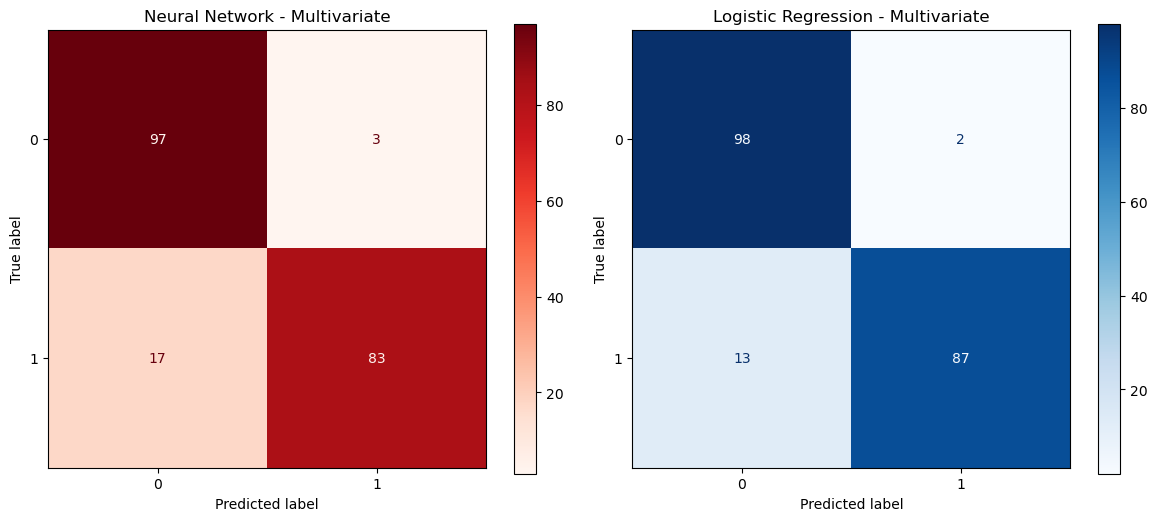

{'Multivariate Neural Network Accuracy': 0.9,
 'Multivariate Logistic Regression Accuracy': 0.925}

In [8]:
# Full pipeline: Multivariate Logistic Regression (Neural Net vs Sklearn) with Confusion Matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

# 1. Generate multivariate classification dataset
X_multi, y_multi = make_classification(n_samples=200, n_features=3, n_informative=3,
                                       n_redundant=0, n_clusters_per_class=1, flip_y=0.03, random_state=42)

# 2. Scale features
scaler_multi = MinMaxScaler()
X_multi_scaled = scaler_multi.fit_transform(X_multi)

# 3. Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. Initialize neural network weights
np.random.seed(0)
w_multi = np.random.randn(3, 1)
b_multi = np.zeros((1,))
lr = 0.1
n_epochs = 1000

# 5. Train neural network
for epoch in range(n_epochs):
    z = X_multi_scaled @ w_multi + b_multi
    y_prob_multi_nn = sigmoid(z)
    error = y_prob_multi_nn - y_multi.reshape(-1, 1)

    dw = X_multi_scaled.T @ error / len(X_multi_scaled)
    db = np.mean(error)

    w_multi -= lr * dw
    b_multi -= lr * db

# 6. Neural network prediction
y_pred_multi_nn = (y_prob_multi_nn >= 0.5).astype(int)

# 7. Sklearn logistic regression
model_multi = LogisticRegression()
model_multi.fit(X_multi, y_multi)
y_pred_lr_multi = model_multi.predict(X_multi)

# 8. Accuracy
acc_nn_multi = accuracy_score(y_multi, y_pred_multi_nn)
acc_lr_multi = accuracy_score(y_multi, y_pred_lr_multi)

# 9. Plot confusion matrices
cm_multi_nn = confusion_matrix(y_multi, y_pred_multi_nn)
cm_multi_lr = confusion_matrix(y_multi, y_pred_lr_multi)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_multi_nn).plot(ax=axes[0], cmap='Reds')
axes[0].set_title("Neural Network - Multivariate")

ConfusionMatrixDisplay(cm_multi_lr).plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Logistic Regression - Multivariate")

plt.tight_layout()
plt.show()

# 10. Output metrics
{
    "Multivariate Neural Network Accuracy": acc_nn_multi,
    "Multivariate Logistic Regression Accuracy": acc_lr_multi
}

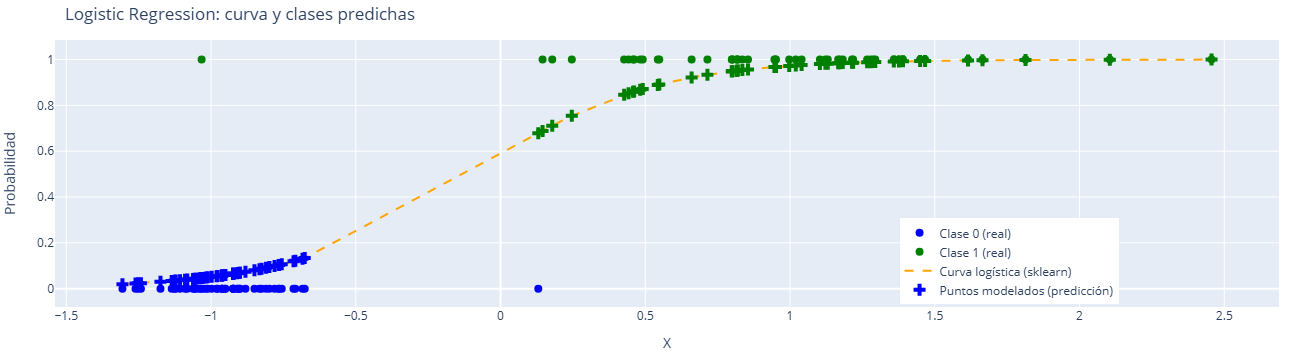

In [9]:
import plotly.graph_objects as go

# Predict probabilities and classes
y_pred_lr_cls = model_uni.predict(X_uni)
y_prob_lr = model_uni.predict_proba(X_uni)[:, 1]

# Sort for clean sigmoid curve
sorted_idx = np.argsort(X_uni[:, 0])
X_sorted = X_uni[sorted_idx].flatten()
y_prob_lr_sorted = y_prob_lr[sorted_idx]
y_pred_cls_sorted = y_pred_lr_cls[sorted_idx]

# Plotly interactive figure
fig = go.Figure()

# Original data points by class
fig.add_trace(go.Scatter(
    x=X_uni[y_uni == 0].flatten(), y=y_uni[y_uni == 0],
    mode='markers',
    marker=dict(color='blue', size=8),
    name='Clase 0 (real)'
))

fig.add_trace(go.Scatter(
    x=X_uni[y_uni == 1].flatten(), y=y_uni[y_uni == 1],
    mode='markers',
    marker=dict(color='green', size=8),
    name='Clase 1 (real)'
))

# Logistic regression sigmoid curve
fig.add_trace(go.Scatter(
    x=X_sorted, y=y_prob_lr_sorted,
    mode='lines',
    line=dict(color='orange', dash='dash'),
    name='Curva logística (sklearn)'
))

# Modeled predicted points colored by predicted class
fig.add_trace(go.Scatter(
    x=X_sorted,
    y=y_prob_lr_sorted,
    mode='markers',
    marker=dict(
        color=['green' if c == 1 else 'blue' for c in y_pred_cls_sorted],
        size=10,
        symbol='cross'
    ),
    name='Puntos modelados (predicción)'
))

fig.update_layout(
    title="Logistic Regression: curva y clases predichas",
    xaxis_title="X",
    yaxis_title="Probabilidad",
    height=500,
    legend=dict(y=0.01, x=0.69),
    margin=dict(l=20, r=20, t=40, b=20)
)

fig.show()

## Representación de Red Neuronal de la Regresión Logística Multinomial
<a id="mlogregnn"></a>

La **regresión logística multinomial** puede visualizarse como una **red neuronal de una sola capa** (sin capas ocultas), donde:

* Cada **característica de entrada** se conecta directamente con **múltiples neuronas de salida** (una por cada clase).
* Cada neurona de salida representa una **puntuación de clase** (*logit*).
* Se incluye un **término de sesgo (bias)** para cada neurona de salida.
* Las salidas se pasan por una **función de activación softmax** para convertir los *logits* en **probabilidades de clase**.


### 🔄 Forma Matemática

Para un vector de características $\mathbf{x} \in \mathbb{R}^d$ y $K$ clases, el modelo calcula:

$$
z_k = \mathbf{w}_k^\top \mathbf{x} + b_k \quad \text{para } k = 1, \dots, K
$$

$$
P(y = k \mid \mathbf{x}) = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}}
$$

Esto es exactamente lo que hace una red neuronal con:

* Transformaciones lineales desde las entradas hacia cada salida
* Función softmax en la capa final
* Entrenamiento mediante pérdida de entropía cruzada


### 🖼️ Diagrama de la Red Neuronal

A continuación se muestra una visualización de esta estructura con 3 características de entrada y 4 clases de salida:

![Red Neuronal para Regresión Logística Multinomial](https://raw.githubusercontent.com/marsgr6/r-scripts/refs/heads/master/imgs/nn_mlogreg.png)

### 🔍 Descripción de la Estructura:

* **Capa de entrada**: 3 características ($x_1, x_2, x_3$)
* **Nodo de sesgo (bias)**: Una entrada constante conectada a cada salida
* **Capa de salida**: Múltiples neuronas (una por cada clase), etiquetadas como `class_1`, `class_2`, `class_3`, etc., cada una aplica la **activación softmax** de manera conjunta

Esta arquitectura calcula para cada clase $k$:

$$
z_k = w_{k1} x_1 + w_{k2} x_2 + w_{k3} x_3 + b_k
$$

y luego transforma estos valores con **softmax**:

$$
P(y = k \mid \mathbf{x}) = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}}
$$

Esto refleja el modelo de **regresión logística multinomial**, expresado como una red neuronal de una sola capa, sin capas ocultas.

### ✅ Puntos Clave

* **Sin capas ocultas** → Es un modelo lineal.
* **Múltiples salidas** → Una neurona por cada clase.
* **Softmax** → Convierte los *logits* en una distribución de probabilidad.
* **Sesgos** → Necesarios para ajustar los límites de decisión de cada clase.

### Recursos

- [La Regresión logística Multinomial](https://nbviewer.org/github/marsgr6/analitica-online/blob/main/predictiva/Unidad_No_4_Regresion_logistica_multinomial.ipynb)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, IntSlider, Checkbox, fixed
import matplotlib.patches as mpatches

# Función principal corregida
def draw_custom_nn(input_size, use_bias, hidden_layers, hidden_neurons_per_layer, output_size, architecture='mlp'):
    G = nx.DiGraph()
    pos = {}
    layer_colors = {
        'input': '#8ecae6',
        'hidden': '#219ebc',
        'output': '#ffb703',
        'bias': '#adb5bd'
    }
    edge_labels = {}

    plt.figure(figsize=(12, 6))
    ax = plt.gca()
    ax.set_title("Neural Network Architecture", fontsize=14)

    # Input layer
    for i in range(input_size):
        node = f"x{i+1}"
        G.add_node(node, layer='input')
        pos[node] = (0, input_size - i - 1)

    if use_bias:
        G.add_node("bias_input", layer='bias')
        pos["bias_input"] = (0, -1)

    if architecture == 'mlp':
        # Hidden layers and biases
        for l in range(hidden_layers):
            layer_offset = 1 + l
            for j in range(hidden_neurons_per_layer):
                h_node = f"h{l+1}_{j+1}"
                G.add_node(h_node, layer='hidden')
                pos[h_node] = (layer_offset, hidden_neurons_per_layer / 2 - j)
            if use_bias and l < hidden_layers - 1:
                bias_node = f"bias_hidden{l+1}"
                G.add_node(bias_node, layer='bias')
                pos[bias_node] = (layer_offset + 0.25, -1*hidden_neurons_per_layer / 2)

        if use_bias and hidden_layers > 0:
            G.add_node("bias_output", layer='bias')
            pos["bias_output"] = (hidden_layers + 0.25, -1*hidden_neurons_per_layer / 2)

        # Conexiones entre capas ocultas
        for l in range(hidden_layers):
            prev_nodes = [f"x{i+1}" for i in range(input_size)] if l == 0 else [f"h{l}_{i+1}" for i in range(hidden_neurons_per_layer)]
            curr_nodes = [f"h{l+1}_{j+1}" for j in range(hidden_neurons_per_layer)]
            for u in prev_nodes:
                for v in curr_nodes:
                    G.add_edge(u, v)
            if use_bias:
                bias_source = "bias_input" if l == 0 else f"bias_hidden{l}"
                for v in curr_nodes:
                    G.add_edge(bias_source, v)

        # Capa de salida
        for k in range(output_size):
            o_node = f"ŷ{k+1}"
            G.add_node(o_node, layer='output')
            pos[o_node] = (1 + hidden_layers, output_size / 2 - k)

        # Conexiones a la salida
        if hidden_layers > 0:
            last_hidden = [f"h{hidden_layers}_{j+1}" for j in range(hidden_neurons_per_layer)]
            for u in last_hidden:
                for k in range(output_size):
                    G.add_edge(u, f"ŷ{k+1}")
            if use_bias:
                for k in range(output_size):
                    G.add_edge("bias_output", f"ŷ{k+1}")
        else:
            for i in range(input_size):
                for k in range(output_size):
                    G.add_edge(f"x{i+1}", f"ŷ{k+1}")
            if use_bias:
                for k in range(output_size):
                    G.add_edge("bias_input", f"ŷ{k+1}")

    elif architecture == 'multinomial_logistic_regression':
        for k in range(output_size):
            o_node = f"class_{k+1}"
            G.add_node(o_node, layer='output')
            pos[o_node] = (1, output_size - k - 1)
        for i in range(input_size):
            for k in range(output_size):
                G.add_edge(f"x{i+1}", f"class_{k+1}")
                #edge_labels[(f"x{i+1}", f"class_{k+1}")] = f"a{i+1}"
        if use_bias:
            for k in range(output_size):
                G.add_edge("bias_input", f"class_{k+1}")
                #edge_labels[("bias_input", f"class_{k+1}")] = "b"

    else:  # regresión lineal
        G.add_node("ŷ", layer='output')
        pos["ŷ"] = (1, 0)
        for i in range(input_size):
            G.add_edge(f"x{i+1}", "ŷ")
            edge_labels[(f"x{i+1}", "ŷ")] = f"a{i+1}"
        if use_bias:
            G.add_edge("bias_input", "ŷ")
            edge_labels[("bias_input", "ŷ")] = "b"

    # Dibujar red
    node_colors = [layer_colors[G.nodes[n]['layer']] for n in G.nodes]
    nx.draw(G, pos, with_labels=True, arrows=True, node_size=1500,
            node_color=node_colors, font_size=10, edge_color='gray')
    
    # Draw edge labels only for regression cases
    if architecture in ['regression', 'multinomial_logistic_regression']:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    patches = [mpatches.Patch(color=color, label=label.capitalize()) for label, color in layer_colors.items()]
    plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# Interfaz interactiva
def interactive_nn(model_type):
    configs = {
        'simple_linear_regression': {
            'architecture': 'regression',
            'input_size': {'min': 1, 'max': 1, 'value': 1},
            'hidden_layers': {'min': 0, 'max': 0, 'value': 0},
            'hidden_neurons_per_layer': {'min': 0, 'max': 0, 'value': 0},
            'output_size': {'min': 1, 'max': 1, 'value': 1}
        },
        'multiple_linear_regression': {
            'architecture': 'regression',
            'input_size': {'min': 2, 'max': 10, 'value': 3},
            'hidden_layers': {'min': 0, 'max': 0, 'value': 0},
            'hidden_neurons_per_layer': {'min': 0, 'max': 0, 'value': 0},
            'output_size': {'min': 1, 'max': 1, 'value': 1}
        },
        'multinomial_logistic_regression': {
            'architecture': 'multinomial_logistic_regression',
            'input_size': {'min': 1, 'max': 10, 'value': 3},
            'hidden_layers': {'min': 0, 'max': 0, 'value': 0},
            'hidden_neurons_per_layer': {'min': 0, 'max': 0, 'value': 0},
            'output_size': {'min': 2, 'max': 10, 'value': 4}
        },
        'mlp': {
            'architecture': 'mlp',
            'input_size': {'min': 2, 'max': 10, 'value': 3},
            'hidden_layers': {'min': 0, 'max': 3, 'value': 1},
            'hidden_neurons_per_layer': {'min': 1, 'max': 10, 'value': 4},
            'output_size': {'min': 1, 'max': 10, 'value': 2}
        }
    }

    config = configs[model_type]
    interact(draw_custom_nn,
             input_size=IntSlider(min=config['input_size']['min'],
                                  max=config['input_size']['max'],
                                  step=1,
                                  value=config['input_size']['value'],
                                  description='Inputs:'),
             use_bias=Checkbox(value=True, description='Include bias'),
             hidden_layers=IntSlider(min=config['hidden_layers']['min'],
                                     max=config['hidden_layers']['max'],
                                     step=1,
                                     value=config['hidden_layers']['value'],
                                     description='Hidden layers:'),
             hidden_neurons_per_layer=IntSlider(min=config['hidden_neurons_per_layer']['min'],
                                                max=config['hidden_neurons_per_layer']['max'],
                                                step=1,
                                                value=config['hidden_neurons_per_layer']['value'],
                                                description='Neurons per layer:'),
             output_size=IntSlider(min=config['output_size']['min'],
                                   max=config['output_size']['max'],
                                   step=1,
                                   value=config['output_size']['value'],
                                   description='Output nodes:'),
             architecture=fixed(config['architecture']))


# Selector principal del modelo
interact(interactive_nn,
         model_type=Dropdown(options={
             'Simple Linear Regression': 'simple_linear_regression',
             'Multiple Linear Regression': 'multiple_linear_regression',
             'Multinomial Logistic Regression': 'multinomial_logistic_regression',
             'MLP': 'mlp'
         }, description='Model Type:'));

interactive(children=(Dropdown(description='Model Type:', options={'Simple Linear Regression': 'simple_linear_…

## ¿Qué es el bias?
<a id="bias"></a>

En una neurona (o unidad), el output es típicamente:

$$
y = f(\mathbf{w}^\top \mathbf{x} + b)
$$

Donde:

* $\mathbf{x}$ son las entradas
* $\mathbf{w}$ son los pesos
* $b$ es el **bias**
* $f$ es la función de activación (sigmoid, ReLU, etc.)

### ¿Para qué sirve el bias?

| Función                            | Explicación                                                              |
| ---------------------------------- | ------------------------------------------------------------------------ |
| **Desplazar la activación**        | Permite que la neurona **se active** aunque todas las entradas sean cero |
| **Ajustar la posición del umbral** | Cambia el punto donde la activación cambia (como mover una recta)        |
| **Flexibiliza el modelo**          | Sin bias, la red **está limitada a funciones que pasan por el origen**   |
| **Facilita el aprendizaje**        | Mejora la capacidad de la red para **ajustarse a patrones** no centrados |


### Ejemplo intuitivo

Imagina una neurona con función ReLU:

$$
f(x) = \max(0, w \cdot x + b)
$$

* Sin bias $b = 0$: la activación se activa solo si $w \cdot x > 0$
* Con bias $b = -5$: la activación puede ser 0 incluso cuando $w \cdot x = 5$

Esto permite mayor **control sobre la región activa de la neurona**.


### ❌ ¿Qué pasa si NO usas bias?

* El modelo pierde **grados de libertad**
* La red puede **no converger bien** o necesitar más capas/neuronas
* Algunas funciones **no se pueden representar** (como regresiones con ordenada ≠ 0)


### ¿Se puede regularizar?

Sí, al igual que los pesos:

* El bias **puede** incluirse en técnicas como L2 regularization (aunque a veces se excluye)
* En capas como `nn.Linear`, `bias=True` por defecto


### 🧩 Conclusión

> El **bias** es crucial para que una red neuronal **pueda aprender desplazamientos**, ajustar límites de decisión y representar correctamente funciones no centradas.
> Sin él, la red se vuelve rígida y menos expresiva.

### Ejemplo de bias para una red de Hopfield

Una **red de Hopfield** es una red neuronal recurrente que almacena patrones como estados estables de la dinámica del sistema. Funciona como una **memoria asociativa**, capaz de recuperar un patrón completo a partir de una versión parcial o ruidosa.

### Estructura básica:

* Neuronas: $N$, con valores binarios $s_i \in \{0, 1\}$
* Conexiones: simétricas $w_{ij} = w_{ji}$, sin autoconexiones $w_{ii} = 0$
* Estado de la red: $\mathbf{s} = [s_1, s_2, ..., s_N]$

### 🔄 Dinámica con función umbral:

La actualización de cada neurona se realiza mediante una **suma ponderada** de sus entradas:

$$
h_i = \sum_{j} w_{ij} s_j
$$

$$
s_i(t+1) = 
\begin{cases}
1 & \text{si } h_i \geq \theta_i \\
0 & \text{si } h_i < \theta_i
\end{cases}
$$

* $\theta_i$: **umbral o bias**, regula el punto en que la neurona se activa
* El umbral puede ajustarse para que la actividad promedio de la red coincida con la de los patrones almacenados

### ¿Por qué es importante el **threshold**?

* Mantiene la **actividad promedio estable** (por ejemplo, 25% de neuronas activas si los patrones lo tienen)
* Evita que la red converja a estados de alta o baja actividad no representativos
* Mejora la **capacidad de recuperación** de patrones codificados con baja densidad (actividad esparsa)

### 🧩 Conclusión

> En una red de Hopfield binaria, el uso de una **función de activación tipo umbral** permite controlar la dinámica de la red. Al ajustar correctamente el umbral (bias), se logra que la red mantenga la misma actividad que los patrones aprendidos, lo que estabiliza la recuperación y evita estados espurios.

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import ipywidgets as widgets
from ipywidgets import interact

def threshold_function(x, bias):
    return np.where(x - bias >= 0, 1, 0)

def std_vec(x):
    return (x - x.mean()) / x.std()

# Constants
N = 1000
k = 50
P = 10
time = 10
C = np.random.randint(0, N, size=(N, k))

def run_simulation(activity=0.25):
    X = bernoulli.rvs(p=activity, size=(P, N))  
    X_std = (X - X.mean(axis=1, keepdims=True)) / X.std(axis=1, keepdims=True)

    W = np.zeros(C.shape)
    for xi in X_std:
        for ni in range(N):
            W[ni] += xi[C[ni]] * xi[ni]

    a = activity
    A = a * (1 - a)
    bias = (1 - 2 * a) / (2 * np.sqrt(A))

    M = []
    for xi in X_std[:1]:
        states = xi.copy()
        m = [(std_vec(states) * std_vec(xi)).mean()]
        neural_input = []
        for ti in range(time):
            neural_input = np.array([((std_vec(states[C[ni]]) * W[ni]).mean()) for ni in range(N)])
            states = np.array([((std_vec(states[C[ni]]) * W[ni]).mean() - bias >= 0) for ni in range(N)])
            m += [(std_vec(states) * std_vec(xi)).mean()]
            if m[-2] == m[-1]:
                break
        M += [m[-1]]

    x = np.linspace(-2, 4, 1000)
    y = threshold_function(x, bias)

    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.plot(x, y, label="f(x) = 1 if x >= threshold else 0")
    plt.plot(neural_input, states, 'o', label="Neuron inputs and states", alpha=0.6)
    plt.title(f"Threshold Function (activity={activity:.2f})")
    plt.xlabel("x: neural input")
    plt.ylabel("f(x): activation function")
    plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
    plt.xlim(-4, 4)
    plt.ylim(-0.1, 1.1)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()

    plt.subplot(1,2,2)
    plt.imshow(bernoulli.rvs(activity, size=(100,100)), cmap='gray')
    plt.axis('off')
    plt.show()

    print(f"Bias: {bias:.2f}, Mean output state: {states.mean():.2f}, Mean input pattern: {X[0].mean():.2f}")

interact(run_simulation, activity=widgets.FloatSlider(value=0.5, min=0.1, max=0.9, step=0.1, description='Activity'));

interactive(children=(FloatSlider(value=0.5, description='Activity', max=0.9, min=0.1), Output()), _dom_classe…

### ¿Qué efecto tiene el bias en un MLP?

Un **MLP (Multilayer Perceptron)** está compuesto por capas de la forma:

$$
\mathbf{z} = \mathbf{W} \cdot \mathbf{x} + \mathbf{b}, \quad \mathbf{a} = f(\mathbf{z})
$$

Donde:

* $\mathbf{W}$: pesos
* $\mathbf{b}$: **bias**
* $f$: función de activación (sigmoid, ReLU, tanh...)

### 🔧 Efectos del bias en un MLP

| Aspecto                          | Efecto del Bias                                                              |
| -------------------------------- | ---------------------------------------------------------------------------- |
| **Desplazamiento del activador** | Permite que la neurona se active aunque todas las entradas sean cero         |
| **Ajuste fino**                  | Mejora la capacidad del modelo para aprender funciones con desplazamiento    |
| **Aprendizaje de umbrales**      | En activaciones como ReLU, el bias ajusta el punto donde la unidad se activa |
| **Control de actividad**         | Puede usarse para mantener ciertas activaciones promedio (como en Hopfield)  |
| **Representación más rica**      | Aumenta la expresividad del modelo sin necesidad de más neuronas o capas     |

## 🔄 Comparación con la red de Hopfield

| Red de Hopfield                         | MLP                                           |
| --------------------------------------- | --------------------------------------------- |
| Activación binaria, dinámica autónoma   | Activación continua, entrenado con datos      |
| Bias = threshold, fija actividad global | Bias = parámetro entrenable, mejora precisión |
| Controla la convergencia a patrones     | Ajusta la frontera de decisión                |

En Hopfield, el threshold **fija una propiedad global de la dinámica** (como la actividad media); en un MLP, el bias se aprende para **ajustar localmente la respuesta de cada unidad** y lograr un mejor rendimiento predictivo.

### 🧩 Conclusión

> En un MLP, el **bias permite desplazar las funciones de activación** para mejorar el ajuste y la capacidad de representación del modelo. Aunque su función es diferente de la red de Hopfield, **ambos casos comparten la idea de que el bias es esencial para un comportamiento flexible y ajustado a los datos o patrones esperados**.

## ¿Qué es el Gradient Descent?
<a id="gradient"></a>

**Gradient Descent** (descenso del gradiente) es un algoritmo de optimización que busca **minimizar una función** ajustando sus parámetros paso a paso en la dirección del descenso más pronunciado (el **gradiente negativo**).

### 🔍 Idea general

Dada una función $f(\theta)$ que queremos minimizar:

$$
\theta \leftarrow \theta - \eta \cdot \nabla f(\theta)
$$

* $\theta$: vector de parámetros (por ejemplo, pesos)
* $\nabla f(\theta)$: gradiente de la función con respecto a $\theta$
* $\eta$: tasa de aprendizaje (**learning rate**)

Se repite este paso iterativamente hasta encontrar un **mínimo local** (idealmente, el global).


### ⚙️ ¿Cómo funciona?

Imagina que estás bajando una colina con niebla. No puedes ver el fondo, pero puedes mirar tus pies y saber hacia dónde desciende el terreno. El gradiente te dice **en qué dirección** ir. El learning rate determina **qué tan lejos avanzas** en cada paso.


### Tipos de Gradient Descent

| Tipo              | Descripción                         | Uso común en redes neuronales |
| ----------------- | ----------------------------------- | ----------------------------- |
| **Batch GD**      | Usa todo el dataset para cada paso  | Poco usado (muy lento)        |
| **Stochastic GD** | Usa 1 ejemplo por paso              | Ruidoso pero rápido           |
| **Mini-batch GD** | Usa pequeños lotes (batch) por paso | ✅ Estándar en deep learning   |


### Gradient Descent en Redes Neuronales

En redes neuronales, **gradient descent** se usa para **ajustar los pesos y bias** de cada capa para minimizar una función de pérdida, como el error cuadrático medio o la entropía cruzada.

### 🔄 El ciclo de entrenamiento:

1. **Propagación hacia adelante**: Calcula la salida de la red
2. **Cálculo del error**: Compara la salida con la verdad esperada
3. **Backpropagation**: Calcula los gradientes del error respecto a cada peso
4. **Actualización de parámetros**: Usa gradient descent para ajustar los pesos

$$
w \leftarrow w - \eta \cdot \frac{\partial L}{\partial w}
$$

Donde:

* $w$: peso
* $L$: función de pérdida

### 📌 Importancia en redes neuronales

| Aspecto            | Rol del gradient descent                        |
| ------------------ | ----------------------------------------------- |
| **Aprendizaje**    | Permite a la red ajustar pesos con el error     |
| **Generalización** | Una buena tasa de aprendizaje evita sobreajuste |
| **Convergencia**   | Dirige el modelo hacia soluciones óptimas       |

### Cuidados comunes

* **Learning rate muy alto** → saltos grandes, no converge
* **Learning rate muy bajo** → convergencia muy lenta
* **Mal inicializado** → puede quedar atrapado en mínimos locales

Por eso, a veces se usa:

* **Momentum**
* **Adaptive learning rates** (como Adam, RMSProp)
* **Regularización** (como L2, dropout)

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from sympy import *

# Define the symbolic function and its derivative
x_sym = symbols('x')
fx = sin(x_sym - 10) + 0.05 * (x_sym - 10)**2 + 10
dfx_sym = diff(fx, x_sym)

# Convert to numpy functions
f = lambdify(x_sym, fx)
dfx = lambdify(x_sym, dfx_sym)

# Define tangent line
def line(x, x1, y1):
    return dfx(x1) * (x - x1) + y1

# Main optimization function
def plot_gradient_descent(x0, lr, min_iterations, max_iterations, use_adaptive_lr):
    clear_output(wait=True)
    
    # Validate iteration range
    if max_iterations < min_iterations:
        max_iterations = min_iterations
    
    a, b = 0, 20
    epsilon = 0.00001
    x = np.linspace(a, b, int((b - a) / epsilon))
    y = f(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x) = sin(x-10) + 0.05*(x-10)² + 10')
    
    x0_l = [x0]
    fx0_l = [f(x0)]
    current_lr = lr
    
    plt.scatter(x0, f(x0), color='r', s=100, label='Initial point')
    xrange = np.linspace(max(a, x0-1), min(b, x0+1), 10)
    plt.plot(xrange, line(xrange, x0, f(x0)), 'C2--', linewidth=2)
    
    # Run gradient descent
    for it in range(max_iterations):
        gradient = dfx(x0)
        if use_adaptive_lr:
            current_lr = lr if it < 10 else 0.3
        
        x0 = x0 - current_lr * gradient
        x0_l.append(x0)
        fx0_l.append(f(x0))
        
        # Plot only if in the specified range
        if it >= min_iterations - 1:
            plt.scatter(x0, f(x0), color='C2', s=50, alpha=0.6)
            xrange = np.linspace(max(a, x0-1), min(b, x0+1), 10)
            plt.plot(xrange, line(xrange, x0, f(x0)), 'C2--', linewidth=2, alpha=0.6)
    
    # Plot path and final point
    plot_start_idx = max(0, min_iterations - 1)
    plt.plot(x0_l[plot_start_idx:], fx0_l[plot_start_idx:], '-o', label='Optimization path')
    plt.scatter(x0_l[-1], fx0_l[-1], color='k', s=200, label='Final point')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent Optimization')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widgets
x0_slider = widgets.FloatSlider(value=1, min=0, max=20, step=0.1, description='x0:')
lr_slider = widgets.FloatSlider(value=2.2, min=0, max=3, step=0.01, description='Learning Rate:')
min_iterations_slider = widgets.IntSlider(value=1, min=1, max=100, step=1, description='Min Iterations:')
max_iterations_slider = widgets.IntSlider(value=30, min=1, max=100, step=1, description='Max Iterations:')
adaptive_lr_toggle = widgets.Checkbox(value=False, description='Adaptive LR')
random_x0_button = widgets.Button(description='Random x0', button_style='info')

# Button callback
def on_random_x0_clicked(b):
    x0_slider.value = np.random.random() * 20  # Random x0 in [0, 20]
    out.outputs = ()  # Force update by clearing output
    plot_gradient_descent(
        x0_slider.value,
        lr_slider.value,
        min_iterations_slider.value,
        max_iterations_slider.value,
        adaptive_lr_toggle.value
    )

random_x0_button.on_click(on_random_x0_clicked)

# Combine widgets into a UI
ui = widgets.VBox([
    widgets.HTML(value='<h3>Gradient Descent Optimization</h3>'),
    x0_slider,
    lr_slider,
    min_iterations_slider,
    max_iterations_slider,
    adaptive_lr_toggle,
    random_x0_button
])

# Create interactive output
out = widgets.interactive_output(plot_gradient_descent, {
    'x0': x0_slider,
    'lr': lr_slider,
    'min_iterations': min_iterations_slider,
    'max_iterations': max_iterations_slider,
    'use_adaptive_lr': adaptive_lr_toggle
})

# Display widgets and output
display(ui, out)

Output()

### **¿Cómo aplicar descenso del gradiente para encontrar la mejor línea recta?**

Queremos encontrar la mejor línea recta $y = wx + b$ que **ajuste un conjunto de puntos** $(x_i, y_i)$. Esto es un problema de **regresión lineal**, y se puede resolver con **descenso por gradiente**.

### 🔢 1. Definimos una función de pérdida (error)

La más común es el **error cuadrático medio (MSE)**:

$$
L(w, b) = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2
$$

Esta función mide **cuán lejos están los puntos predichos** de los reales.

### 🔁 2. Algoritmo de Descenso por Gradiente

Calculamos el gradiente de la pérdida respecto a $w$ y $b$:

$$
\frac{\partial L}{\partial w} = -\frac{2}{n} \sum (y_i - (wx_i + b)) \cdot x_i
$$

$$
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum (y_i - (wx_i + b))
$$

Luego actualizamos:

$$
w \leftarrow w - \eta \cdot \frac{\partial L}{\partial w}
\quad
b \leftarrow b - \eta \cdot \frac{\partial L}{\partial b}
$$

donde $\eta$ es el **learning rate**.

### 🧭 3. Repetimos hasta converger

Se ejecutan varias **épocas** hasta que el error deje de disminuir significativamente.

### ⚖️ **¿Por qué es importante escalar los datos?**

### Problema:

Si tus datos tienen rangos muy diferentes (por ejemplo, $x \in [1, 1000]$), el gradiente puede volverse muy **inestable** o muy **lento** en converger.

### Solución: **escalar** los datos

* Usamos `MinMaxScaler` o `StandardScaler` para llevar $x$ e $y$ a rangos comparables.
* Esto mejora:

  * La **velocidad de entrenamiento**
  * La **estabilidad del gradiente**
  * La **precisión numérica**


### ¿Por qué volver a la escala original al final?

Porque el modelo fue entrenado en la escala transformada, pero los usuarios o sistemas necesitan resultados en la **escala real del problema** (por ejemplo, en dólares, grados, etc.).

> Por eso, al final usamos `.inverse_transform()` del `scaler` para convertir las predicciones y compararlas con los datos reales.


### 🧩 Conclusión

El **descenso del gradiente** permite encontrar los parámetros $w, b$ que mejor ajustan una línea recta a los datos.
**Escalar los datos** estabiliza y acelera ese proceso.
**Volver a la escala original** garantiza que los resultados sean comprensibles y útiles.

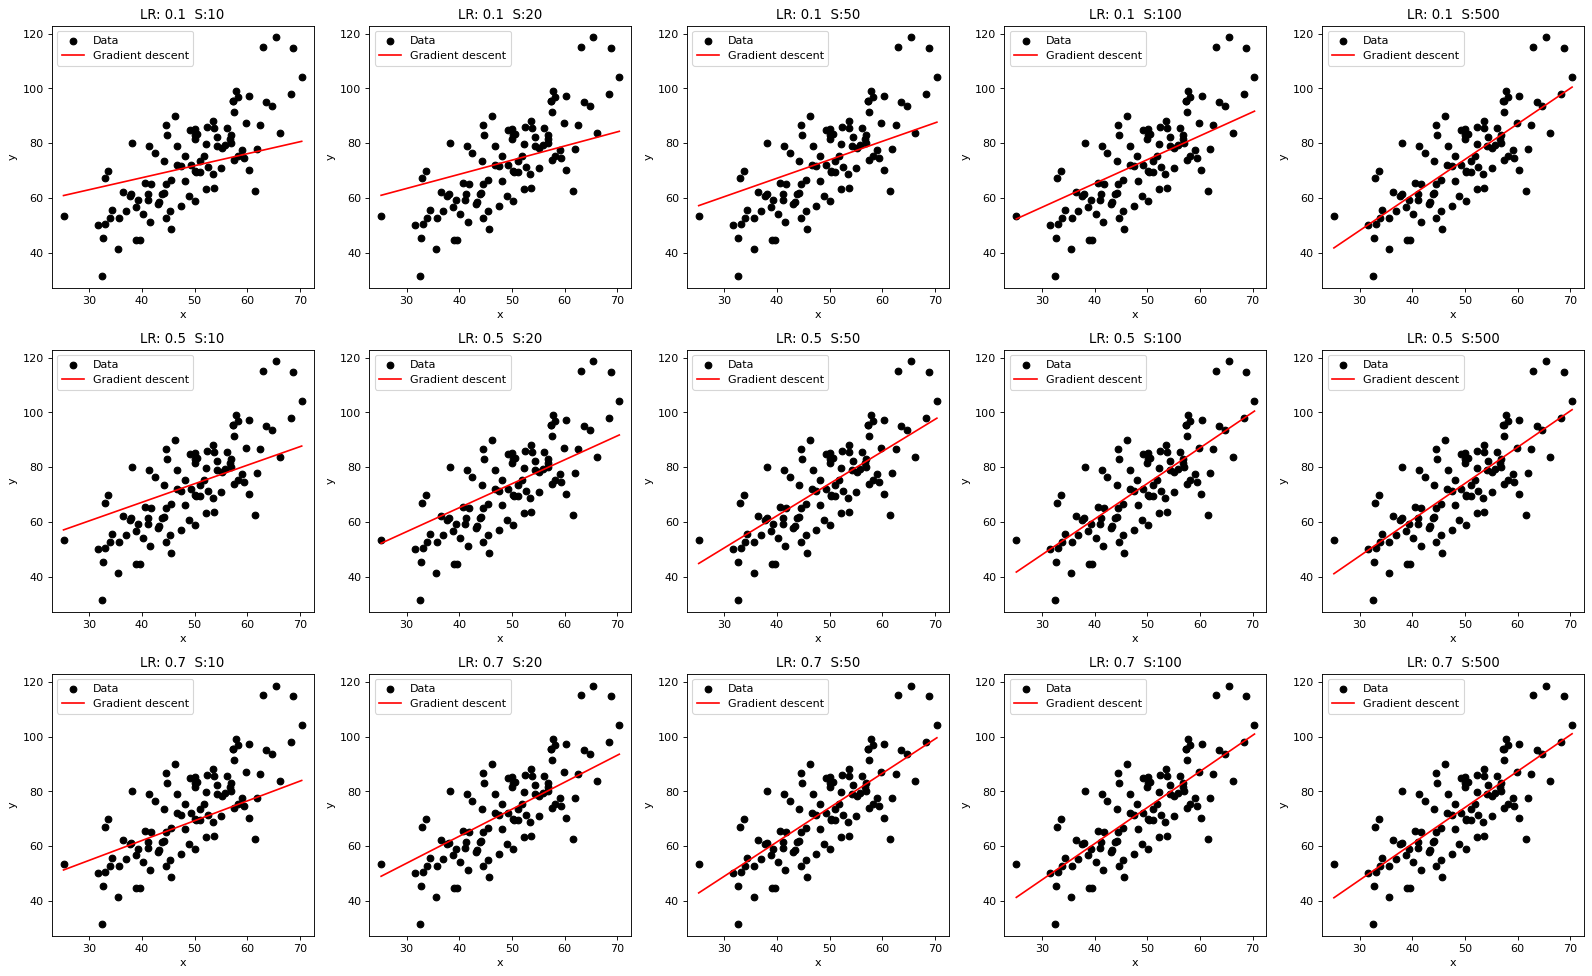

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/data_gd_demo.csv", header=None)
df.columns = ['xi', 'yi']  # Assign column names

# Store original min/max before normalization
xi_min, xi_max = df['xi'].min(), df['xi'].max()
yi_min, yi_max = df['yi'].min(), df['yi'].max()

# Normalize data for gradient descent
df_normalized = (df - df.min()) / (df.max() - df.min())

# Gradient descent function (assumed)
def gradient_descent(m, b, data, L):
    N = len(data)
    m_grad = 0
    b_grad = 0
    for i in range(N):
        x = data['xi'].iloc[i]
        y = data['yi'].iloc[i]
        y_pred = m * x + b
        m_grad += -(2/N) * x * (y - y_pred)
        b_grad += -(2/N) * (y - y_pred)
    m = m - L * m_grad
    b = b - L * b_grad
    return m, b

# Denormalize parameters
def denormalize_parameters(m, b, xi_min, xi_max, yi_min, yi_max):
    m_original = m * (yi_max - yi_min) / (xi_max - xi_min)
    b_original = b * (yi_max - yi_min) + yi_min - m_original * xi_min
    return m_original, b_original

# Plotting
learning_rates = [0.1, 0.5, 0.7]
steps = [10, 20, 50, 100, 500]

fig = plt.figure(figsize=(20, 20), dpi=80)
for cont1, learn in enumerate(learning_rates):
    for cont2, step in enumerate(steps):
        m = 0
        b = 0
        L = learn
        epochs = step
        for i in range(epochs):
            m, b = gradient_descent(m, b, df_normalized, L)
        
        # Denormalize parameters
        m_original, b_original = denormalize_parameters(m, b, xi_min, xi_max, yi_min, yi_max)
        
        # Generate predictions in original scale
        linspace_normalized = np.linspace(df_normalized['xi'].min(), df_normalized['xi'].max(), 100)
        linspace_original = linspace_normalized * (xi_max - xi_min) + xi_min
        datax = [m_original * x + b_original for x in linspace_original]
        
        ax1 = plt.subplot2grid((5, 5), (cont1, cont2))
        ax1.scatter(df['xi'], df['yi'], label='Data', color="black")
        ax1.title.set_text(f'LR: {learn}  S:{step}')
        ax1.plot(linspace_original, datax, color="red", label='Gradient descent')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.legend()

plt.tight_layout()
plt.show()

## Mi primer Multi-layer Perceptron (MLP)
<a id="mlp"></a>

